In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from log_columns import log_columns

plt.rcParams['figure.figsize'] = (16, 9)

In [24]:
movies = pd.read_csv("./data/movies_prop_df.csv", index_col=0)
movies.head()

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda
0,10344754,毒战 毒戰,2012,刚刚结束一次危险任务的津海市缉毒大队队长张雷（孙红雷 饰），在医院意外见到因车祸入院治疗的香...,"['剧情', '动作', '犯罪']",210072,10,2,7.5,34235,...,0,0,0,0,0,0,0,0,0,0
1,10355621,粉红女郎之爱人快跑,2013,为了泡到一个男朋友，结婚狂（阿雅 饰）碰见魔术师高明（锦荣 饰）后，便告诉对方自己怀了他的孩...,"['喜剧', '爱情']",1826,10,2,3.2,65,...,0,0,0,0,0,0,0,0,0,0
2,10355633,绝命藏宝图,2012,一对不食人间烟火的青年男女——彭少文和程雪珂狼狈地逃到余姚县城门口，他们身后有一群凶神恶煞的...,"['动作', '悬疑']",78,10,2,3.2,43,...,0,0,0,0,0,0,0,0,0,0
4,10430281,七个隆咚锵咚锵,2012,韩峰（韩兆 饰）在一天之内丢掉了工作和恋人，一无所有的他陷入了人生的低谷之中。然而，韩峰的运...,"['喜剧', '爱情']",506,10,2,4.9,115,...,0,0,0,0,0,0,0,0,0,0
5,10437802,武当少年 武當少年,2010,主人公翔翔原本是一个天真浪漫，活泼好动的孩子，在一次观看武当武校在台湾的表演后，萌生了赴武当...,"['剧情', '儿童']",68,10,2,6.1,2,...,0,0,0,0,0,0,0,0,0,0


## Rating Value

In [25]:
y = movies.ratingValue
X = movies.iloc[:,12:]
# add intercept
X.insert(0, "intercept", 1)
X.head()

,intercept,directorSumEffect,actorSumEffect,writerSumEffect,d动画,d悬疑,d剧情,d西部,d犯罪,d灾难,...,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda
0,1,34235,107664,7410,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,65,13658,65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,43,69,43,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,115,340,115,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,2,233,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
log_columns(X, ["directorSumEffect", "actorSumEffect", "writerSumEffect"])

In [27]:
mod = sm.OLS(y, X)
res = mod.fit(cov_type='hc3')
print(res.summary())
# fit is not better, and neither is the coefficient on propaganda significant

                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     64.68
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:52:55   Log-Likelihood:                -4740.0
No. Observations:                2996   AIC:                             9562.
Df Residuals:                    2955   BIC:                             9808.
Df Model:                          40                                         
Covariance Type:                  hc3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               4.8099    

<AxesSubplot:xlabel='dPropaganda', ylabel='ratingValue'>

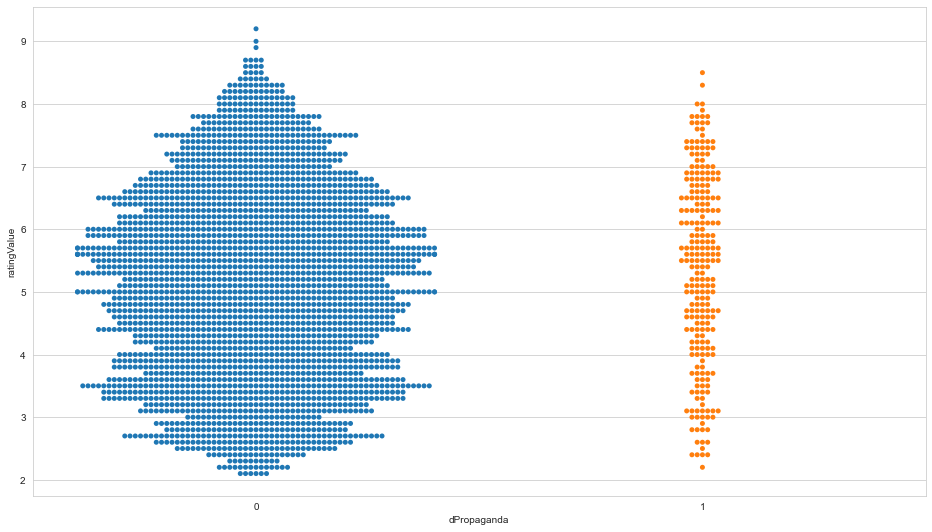

In [28]:
sns.swarmplot(x=movies.dPropaganda,
              y=movies.ratingValue)

## Log Rating Count

In [29]:
y = movies.ratingCount.apply(np.log)

In [30]:
mod = sm.OLS(y, X)
res = mod.fit(cov_type='hc3')
print(res.summary())
# it appears they are seen less? By 28%, no less
# fit has improved only marginally

                            OLS Regression Results                            
Dep. Variable:            ratingCount   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     152.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:53:14   Log-Likelihood:                -5313.5
No. Observations:                2996   AIC:                         1.071e+04
Df Residuals:                    2955   BIC:                         1.096e+04
Df Model:                          40                                         
Covariance Type:                  hc3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               1.7855    

<AxesSubplot:xlabel='dPropaganda', ylabel='ratingCount'>

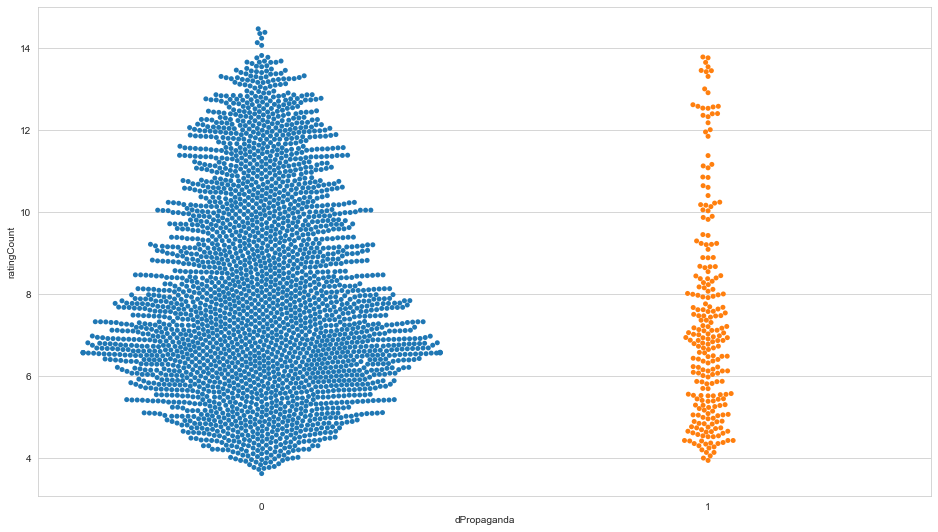

In [31]:
sns.swarmplot(x=movies.dPropaganda,
              y=movies.ratingCount.apply(np.log))